In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from scipy.stats import bernoulli


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D , Dense, Dropout, Flatten, Lambda, ELU, MaxPooling2D , ReLU , MaxPool2D
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam


import argparse
import base64
from datetime import datetime
import os
import shutil
import math
import cv2
import numpy as np
import socketio
import eventlet
import eventlet.wsgi
from PIL import Image
from flask import Flask
from io import BytesIO
import matplotlib.pyplot as plt

from keras.models import load_model
import h5py
from keras import __version__ as keras_version



In [195]:
MIDUS2DATAFILE = 'MIDUS_2_DATA.tsv'
MIDUS1DATAFILE = 'MIDUS_1_DATA.tsv'
MIDUS_2_Data = pd.read_csv(MIDUS2DATAFILE, sep='\t')
MIDUS_1_Data = pd.read_csv(MIDUS1DATAFILE, sep='\t')
MIDUS_1_Data

,M2ID,M2FAMNUM,SAMPLMAJ,A1STATUS,A1PAGE_M2,A1PRAGE_2019,M1AGE_FLAG,A1PBYEAR,A1PBYEAR_2019,M1BYEAR_FLAG,...,A1SS15_8,A1SS15_9,A1SS15_10,A1SS16,A1SS17,A1ST1,A1ST2,A1ST3,A1ST4,A1ST5
0,10001,110498,2,2,53,53,0,1943,1943,0,...,8,8,8,4,4,8,5,8,8,8
1,10002,100001,1,1,60,60,0,1935,1935,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,10004,100002,1,2,69,69,0,1925,1925,0,...,9,9,9,9,9,8,7,8,8,8
3,10005,120803,3,2,70,70,0,1924,1924,0,...,9,9,9,9,9,10,10,10,10,10
4,10006,120772,3,2,51,51,0,1944,1944,0,...,9,9,9,9,9,6,4,8,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103,19188,120285,3,2,42,42,0,1952,1952,0,...,9,9,9,9,9,7,9,9,8,7
7104,19189,103713,1,1,98,61,3,9998,1933,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7105,19190,110528,1,2,35,35,0,1960,1960,0,...,9,9,9,9,9,9,8,9,9,9
7106,19191,120390,3,2,35,35,0,1960,1960,0,...,2,1,2,4,4,10,10,10,10,10


In [196]:
MIDUS_2_Data

,M2ID,M2FAMNUM,SAMPLMAJ,B1STATUS,B1PAGE_M2,B1PRAGE_2019,M2AGE_FLAG,B1PBYEAR,B1PBYEAR_2019,M2BYEAR_FLAG,...,B1SP3I,B1SP3J,B1SP4,B1SP5,B1SQ1,B1SQ2,B1SQ3,B1SQ4,B1SQ5,B1SQ6
0,10001,110498,2,2,61,61,0,1943,1943,0,...,8,8,8,8,8,5,7,8,8,8
1,10002,100001,1,2,69,69,0,1935,1935,0,...,8,8,8,8,9,9,9,7,6,10
2,10005,120803,3,2,80,80,0,1924,1924,0,...,8,8,8,8,10,10,10,10,10,10
3,10006,120772,3,1,60,60,0,1944,1944,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,10010,120378,3,2,55,55,0,1948,1948,0,...,2,2,3,3,8,8,8,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958,19186,120914,3,1,66,66,0,1938,1938,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4959,19187,103712,4,1,55,55,0,1950,1950,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4960,19190,110528,1,2,44,44,0,1960,1960,0,...,8,8,8,8,9,9,9,9,9,9
4961,19191,120390,3,1,43,43,0,1960,1960,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [197]:
print(MIDUS_1_Data['A1PDEPDX'].unique())
print(MIDUS_2_Data['B1PDEPDX'].unique())

[0 1]
[0 1]


In [198]:
merged_data = pd.merge(MIDUS_1_Data , MIDUS_2_Data , on = "M2ID" , how="inner")
merged_data

,M2ID,M2FAMNUM_x,SAMPLMAJ_x,A1STATUS,A1PAGE_M2,A1PRAGE_2019,M1AGE_FLAG,A1PBYEAR,A1PBYEAR_2019,M1BYEAR_FLAG,...,B1SP3I,B1SP3J,B1SP4,B1SP5,B1SQ1,B1SQ2,B1SQ3,B1SQ4,B1SQ5,B1SQ6
0,10001,110498,2,2,53,53,0,1943,1943,0,...,8,8,8,8,8,5,7,8,8,8
1,10002,100001,1,1,60,60,0,1935,1935,0,...,8,8,8,8,9,9,9,7,6,10
2,10005,120803,3,2,70,70,0,1924,1924,0,...,8,8,8,8,10,10,10,10,10,10
3,10006,120772,3,2,51,51,0,1944,1944,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,10010,120378,3,2,46,46,0,1948,1948,0,...,2,2,3,3,8,8,8,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958,19186,120914,3,2,57,57,0,1938,1938,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4959,19187,103712,4,2,45,45,0,1950,1950,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4960,19190,110528,1,2,35,35,0,1960,1960,0,...,8,8,8,8,9,9,9,9,9,9
4961,19191,120390,3,2,35,35,0,1960,1960,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [199]:
variables = [
    'A1SPWBR',
    'B1SPWBR1',
    'A1SPWBS',
    'B1SPWBS1',
    'A1SPWBA',
    'B1SPWBA1',
    'A1SPWBG',
    'B1SPWBG1',
    'A1SPWBE',
    'B1SPWBE1',
    'A1SPWBU',
    'B1SPWBU1',
    'A1PDEPAD',
    'B1PDEPAD',
    'A1PDEPDX',
    'B1PDEPDX',
    
    'A1PD1',
    'A1SF1C',
    'A1SF1D',
    'A1SF1F',
    'A1SF1I',
    'A1SF1K',
    'A1SF1L',
    'A1SF1M',
    'A1SF1U',
    'A1SF1X',
    'A1SF1Y',
    'A1SF1Z',
    'A1SF3B',
    'A1SF3P',
    'A1SF3Q',
    'A1SF3T',
    'A1SF3W',
    'A1SF4A',
    'A1SF4D',
    'A1SF4Y',
    'A1SF4Z',
    'A1SK10A',
    'A1SK17A',
    'A1SK17F',
    'A1SK17G',
    'A1SK17J',
    'A1SK17M',
    'A1SK17N',
    'A1SK7I',
    'A1SK7Q',
    'A1SM13',
    'A1SM5',
    
]

In [200]:
merged_data.drop(merged_data.columns.difference(variables), 1, inplace=True)

C:\Users\Ultriva\AppData\Local\Temp\ipykernel_27456\619482246.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  merged_data.drop(merged_data.columns.difference(variables), 1, inplace=True)


In [201]:
merged_data.head()

,A1PDEPAD,A1PDEPDX,A1PD1,A1SF1C,A1SF1D,A1SF1F,A1SF1I,A1SF1K,A1SF1L,A1SF1M,...,A1SM5,A1SM13,B1PDEPAD,B1PDEPDX,B1SPWBA1,B1SPWBE1,B1SPWBG1,B1SPWBR1,B1SPWBU1,B1SPWBS1
0,0,0,1,2,3,3,3,2,2,3,...,1,2,0,0,13.0,14.0,14.0,12.0,17.0,15.0
1,0,0,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,21.0,16.0,17.0,13.0,17.0,19.0
2,0,0,1,1,7,7,1,1,1,1,...,1,1,0,0,20.0,20.0,20.0,20.0,21.0,20.0
3,1,1,1,2,1,2,2,1,1,3,...,4,4,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,0,0,2,2,1,2,1,1,1,1,...,4,1,0,0,18.0,16.0,16.0,12.0,9.0,15.0


In [202]:
features = [
    'A1PD1', # Satisfied with life at present
    'A1SF1C', # Some wander aimlessly, but not me
    'A1SF1D',# Demands of everyday life often get me down
    'A1SF1F', # Maintaining close relationships difficult
    'A1SF1I', # Good managing daily responsibilities
    'A1SF1K', # Life process of learning/changing/growth
    'A1SF1L', # Experience challenge how think important
    'A1SF1M', # Others describe me as giving/share time
    'A1SF1U', # Do just about anything I set my mind to
    'A1SF1X', # When really want something, find way
    'A1SF1Y', # Many things interfere with what I want do
    'A1SF1Z', # Whether I get what want is in own hands
    'A1SF3B', # Do what can to change for better
    'A1SF3P', # Know what I want out of life
    'A1SF3Q', # I live one day at a time
    'A1SF3T', # Helpful to set goals for near future
    'A1SF3W', # No use in thinking about past because nothing can be done
    'A1SF4A', # Outgoing describes you how well
    'A1SF4D', # Organized describes you how well
    'A1SF4Y', # Broad minded describes you how well
    'A1SF4Z', # Sympathetic describes you how well
    'A1SK10A', # Give spouse/partner emotional support (hours/month)
    'A1SK17A', # World is too complex for me
    'A1SK17F', # Feel close to others in community
    'A1SK17G', # Daily activities not worthwhile for community
    'A1SK17J', # People do not care about others problems
    'A1SK17M', # Society not improving for people like me
    'A1SK17N', # Believe people are kind
    'A1SK7I', # Serve on a jury if called
    'A1SK7Q', # Volunteer for social causes
    'A1SM13', # Rely on friends for help with problem
    'A1SM5', # Open up to family about worries
]

targets = [
    'A1SPWBR',
    'B1SPWBR1',
    'A1SPWBS',
    'B1SPWBS1',
    'A1SPWBA',
    'B1SPWBA1',
    'A1SPWBG',
    'B1SPWBG1',
    'A1SPWBE',
    'B1SPWBE1',
    'A1SPWBU',
    'B1SPWBU1',
    'A1PDEPAD',
    'B1PDEPAD',
    'A1PDEPDX',
    'B1PDEPDX',
]
well_being_target_future = [
    'B1SPWBR1',
    'B1SPWBS1',
    'B1SPWBA1',
    'B1SPWBG1',
    'B1SPWBE1',
    'B1SPWBU1',
]
well_being_target_currnet = [
    'A1SPWBR',
    'A1SPWBS',
    'A1SPWBA',
    'A1SPWBG',
    'A1SPWBE',
    'A1SPWBU',
]

In [209]:
delete_columns = well_being_target_future + features  + ['A1PDEPAD','B1PDEPAD','A1PDEPDX','B1PDEPDX',]
for column_name in delete_columns  : 
    dropIndex = merged_data[( merged_data[column_name] == -1 ) ].index
    merged_data.drop(dropIndex , inplace=True)
    
    
merged_data['A1SK17J'].unique()

array([5, 7, 1, 6, 2, 8, 4, 3], dtype=int64)

In [117]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler_Feature = {}
for feature in features:
    scaler = MinMaxScaler()
    scaler.fit(np.array(merged_data[feature]).reshape(-1,1))
    MinMaxScaler_Feature[feature] = scaler
    merged_data[feature] = scaler.transform(np.array(merged_data[feature]).reshape(-1,1))

merged_data

,A1PDEPAD,A1PDEPDX,A1PD1,A1SF1C,A1SF1D,A1SF1F,A1SF1I,A1SF1K,A1SF1L,A1SF1M,...,A1SM5,A1SM13,B1PDEPAD,B1PDEPDX,B1SPWBA1,B1SPWBE1,B1SPWBG1,B1SPWBR1,B1SPWBU1,B1SPWBS1
0,0,0,0.000000,0.142857,0.285714,0.285714,0.285714,0.142857,0.142857,0.285714,...,0.000000,0.142857,0,0,13.0,14.0,14.0,12.0,17.0,15.0
2,0,0,0.000000,0.000000,0.857143,0.857143,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,20.0,20.0,20.0,20.0,21.0,20.0
4,0,0,0.166667,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,...,0.428571,0.000000,0,0,18.0,16.0,16.0,12.0,9.0,15.0
5,0,0,0.000000,0.142857,0.571429,0.857143,0.000000,0.000000,0.142857,0.000000,...,0.000000,0.142857,1,1,16.0,18.0,17.0,21.0,19.0,15.0
7,0,0,0.166667,0.142857,0.285714,0.142857,0.000000,0.000000,0.000000,0.142857,...,0.000000,0.142857,0,0,16.0,12.0,16.0,17.0,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,0,0,0.000000,0.000000,0.857143,0.857143,0.000000,0.000000,0.285714,0.000000,...,0.000000,0.000000,0,0,21.0,20.0,16.0,21.0,20.0,21.0
4955,0,0,0.000000,0.000000,0.285714,0.571429,0.142857,0.000000,0.285714,0.285714,...,0.000000,0.142857,0,0,19.0,20.0,20.0,21.0,16.0,21.0
4956,0,0,0.000000,0.000000,0.285714,0.857143,0.000000,0.285714,0.142857,0.142857,...,0.000000,0.000000,0,0,14.0,15.0,18.0,19.0,20.0,14.0
4960,0,0,0.000000,0.428571,0.714286,0.857143,0.142857,0.142857,0.142857,0.142857,...,0.000000,0.142857,0,0,12.0,16.0,17.0,19.0,20.0,21.0


In [118]:
def corr_plot_variables(df , columns):
    
    f = plt.figure(figsize=(19, 15))
    plt.matshow(df[columns].corr(), fignum=f.number)
    plt.xticks(range(df[columns].select_dtypes(['number']).shape[1]), df[columns].select_dtypes(['number']).columns, fontsize=14, rotation=45)
    plt.yticks(range(df[columns].select_dtypes(['number']).shape[1]), df[columns].select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16);

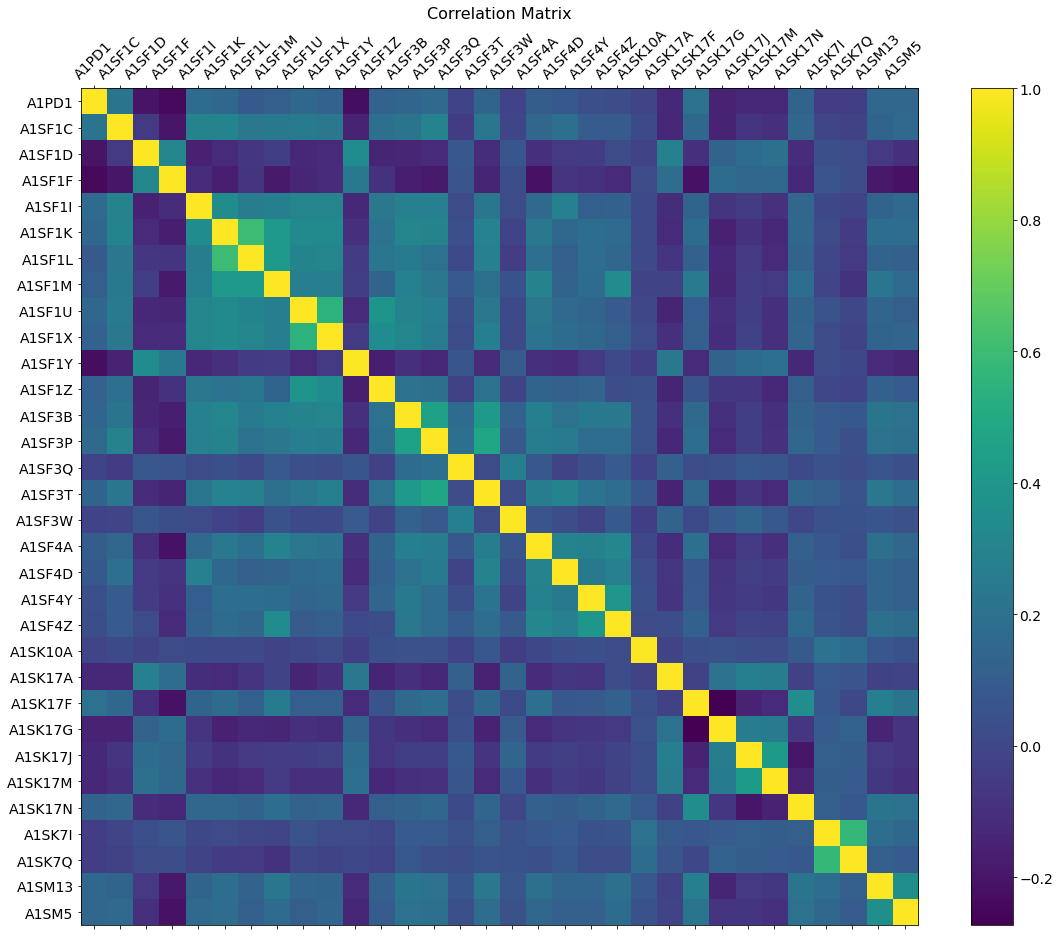

In [119]:
corr_plot_variables(merged_data , features)

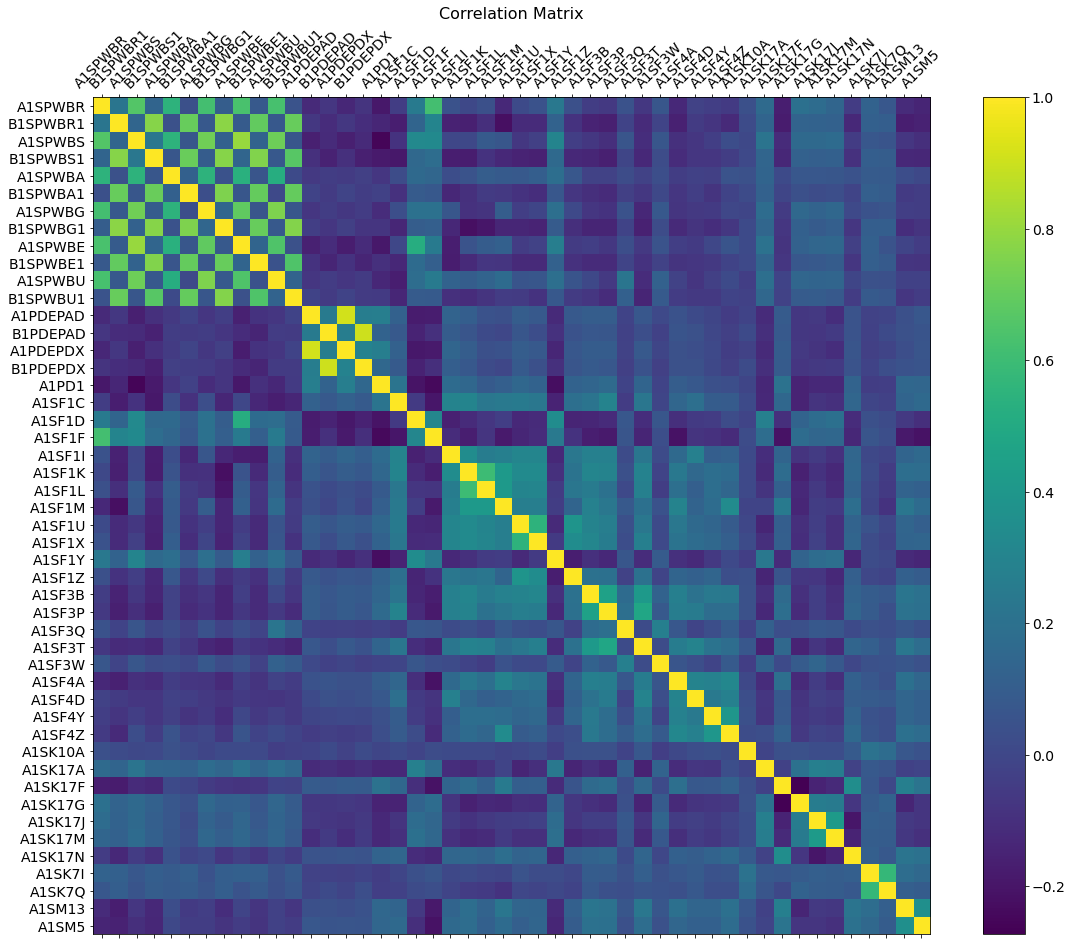

In [120]:
corr_plot_variables(merged_data , variables)

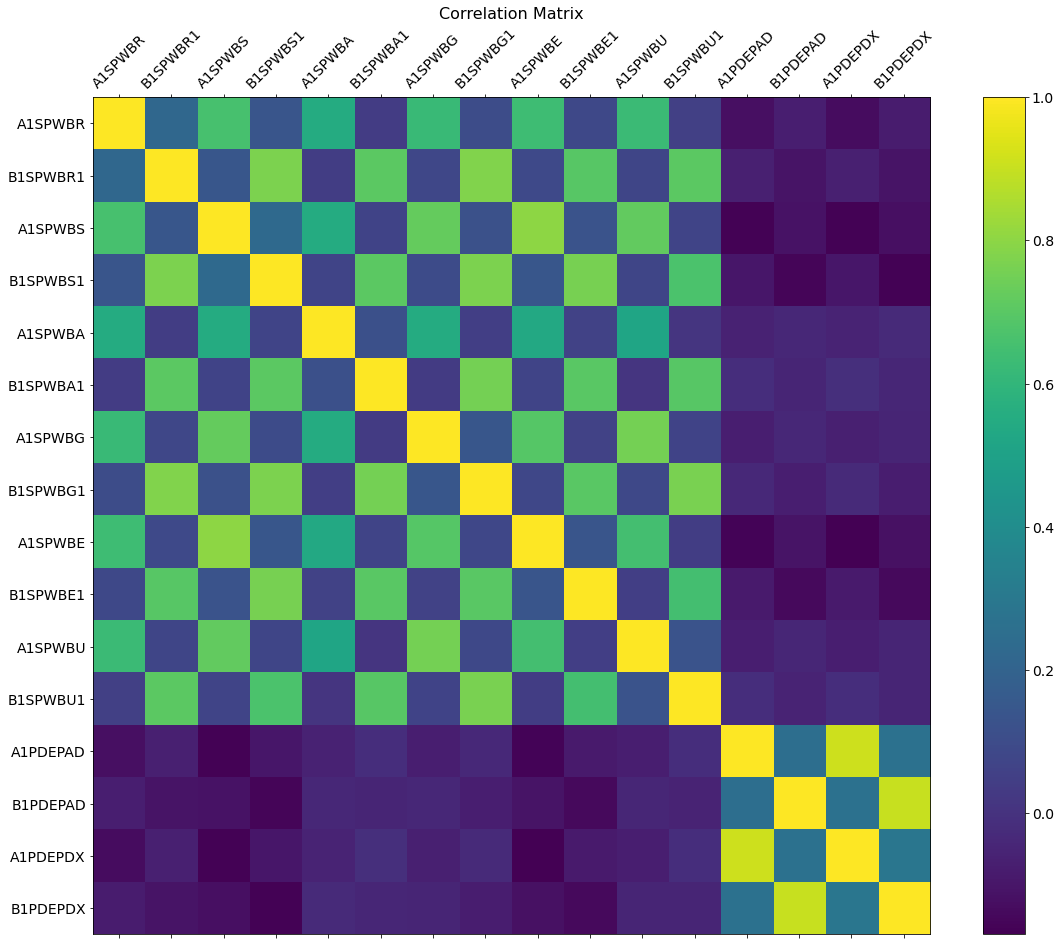

In [121]:
corr_plot_variables(merged_data , targets)

In [124]:
import math
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle


subjects_depressed_test = merged_data[merged_data['A1PDEPDX'] == 1 | merged_data['A1PDEPAD'] == 1]
subjects_normal_train = merged_data[merged_data['A1PDEPDX'] == 0 & merged_data['A1PDEPAD'] == 0]
depressed_ratio = (len(subjects_depressed_test) / len(subjects_normal_train))
print("depressed ratio : " , depressed_ratio)

subjects_depressed_test_x = subjects_depressed_test[features]
subjects_depressed_test_y = subjects_depressed_test[well_being_target_future]

train_x , subjects_normal_test_x , train_y , subjects_normal_test_y = train_test_split(
    subjects_normal_train[features], subjects_normal_train[well_being_target_future], test_size= (0.26 - depressed_ratio) , random_state=42)

test_x = subjects_normal_test_x.append(subjects_depressed_test_x, ignore_index=True)
test_y = subjects_normal_test_y.append(subjects_depressed_test_y, ignore_index=True)

print("train x size : " , len(train_x))
print("train y size : " , len(train_y))
print("test x size : " , len(test_x))
print("test y size : " , len(test_y))

X_sparse = coo_matrix(test_x)
test_x, X_sparse, test_y = shuffle(test_x, X_sparse, test_y, random_state=0)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [125]:
import tensorflow as tf

def create_model():
    drop_prob = 0.30
    reg_val = 1e-7
    
    model = Sequential()
    model.add(tf.keras.Input(shape=(32,)))
    
    model.add(tf.keras.layers.Dense(400 , activity_regularizer=tf.keras.regularizers.L2(reg_val)))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.3 ))
    model.add(Dropout(drop_prob))
    
    model.add(tf.keras.layers.Dense(400 , activity_regularizer=tf.keras.regularizers.L2(reg_val)))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.3 , activity_regularizer=tf.keras.regularizers.L2(reg_val)))
    model.add(Dropout(drop_prob))
    
    model.add(tf.keras.layers.Dense(400 , activity_regularizer=tf.keras.regularizers.L2(reg_val)))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.3 , activity_regularizer=tf.keras.regularizers.L2(reg_val)))
    model.add(Dropout(drop_prob))
    
    model.add(tf.keras.layers.Dense(400 , activity_regularizer=tf.keras.regularizers.L2(reg_val)))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.3 , activity_regularizer=tf.keras.regularizers.L2(reg_val)))
    model.add(Dropout(drop_prob))
    
    model.add(Dense(6))
    
    
    return model

In [126]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 400)               13200     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 400)               0         
                                                                 
 dropout_4 (Dropout)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 400)               160400    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 400)               0         
                                                                 
 dropout_5 (Dropout)         (None, 400)               0         
                                                                 
 dense_7 (Dense)             (None, 400)              

In [127]:
adam = tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=adam, loss="mae") # , metrics=['accuracy']

In [128]:
import datetime
early_stop = EarlyStopping(monitor='val_loss', patience=100,verbose=1, mode='min')
checkpoint = ModelCheckpoint('checkpoints_future_wellbeing/'+'model'+'-{epoch:02d}-{val_loss:.4f}',  monitor='val_loss'
                             ,verbose=0, save_best_only=True, 
                             save_weights_only=False, mode='auto')

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [129]:
gpu_devices = tf.config.list_physical_devices('GPU')
print(gpu_devices)
is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)
print(is_cuda_gpu_available)
if gpu_devices:
    details = tf.config.experimental.get_device_details(gpu_devices[0])
    details.get('device_name', 'Unknown GPU')
print(details)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True
{'device_name': 'NVIDIA GeForce GTX 1650', 'compute_capability': (7, 5)}


In [22]:
model.fit(
        train_x,
        train_y,
        batch_size=64,
        epochs=1000,
        verbose=1,
        callbacks=[early_stop,checkpoint,tensorboard_callback],
        validation_split=0.2,
        shuffle = True
    )

Epoch 1/1000
38/38 [==============================] - 13s 215ms/step - loss: 16.0251 - val_loss: 14.0338
Epoch 2/1000
38/38 [==============================] - 7s 176ms/step - loss: 7.6524 - val_loss: 3.6542
Epoch 3/1000
38/38 [==============================] - 4s 110ms/step - loss: 3.8454 - val_loss: 3.4874
Epoch 4/1000
38/38 [==============================] - 4s 99ms/step - loss: 3.7784 - val_loss: 3.4108
Epoch 5/1000
38/38 [==============================] - 4s 113ms/step - loss: 3.6614 - val_loss: 3.3519
Epoch 6/1000
38/38 [==============================] - 5s 123ms/step - loss: 3.6404 - val_loss: 3.3013
Epoch 7/1000
38/38 [==============================] - 1s 21ms/step - loss: 3.5693 - val_loss: 3.3041
Epoch 8/1000
38/38 [==============================] - 5s 122ms/step - loss: 3.5404 - val_loss: 3.2302
Epoch 9/1000
38/38 [==============================] - 7s 177ms/step - loss: 3.4678 - val_loss: 3.1939
Epoch 10/1000
38/38 [==============================] - 6s 150ms/step - loss: 3.41


KeyboardInterrupt



In [23]:
model.evaluate(test_x, test_y, batch_size=64)

15/15 [==============================] - 0s 6ms/step - loss: 3.1652


3.1651554107666016

In [24]:
model_1 = load_model('final models future wellbeing/model-35-2.7160')
model_2 = load_model('final models future wellbeing/model-239-2.6257')
model_3 = load_model('final models future wellbeing/model-337-2.6285')

In [25]:
model_1.evaluate(test_x, test_y, batch_size=64)

15/15 [==============================] - 0s 7ms/step - loss: 2.9591


2.9591121673583984

In [26]:
model_2.evaluate(test_x, test_y, batch_size=64)

15/15 [==============================] - 0s 8ms/step - loss: 2.9316


2.9316253662109375

In [27]:
model_3.evaluate(test_x, test_y, batch_size=64)

15/15 [==============================] - 0s 7ms/step - loss: 2.9309


2.9308829307556152

In [31]:
data = train_x.values
data.shape

(3029, 32)

In [41]:
from minisom import MiniSom    
som = MiniSom(25, 25, 32, sigma=1.8,activation_distance = 'euclidean',
              learning_rate=0.4 , neighborhood_function='gaussian' , random_seed=10)
som.train(data, 200000, verbose=True)

 [    308 / 200000 ]   0% - 0:01:57 left 

 [    639 / 200000 ]   0% - 0:01:54 left 

 [    977 / 200000 ]   0% - 0:01:53 left 

 [   1298 / 200000 ]   1% - 0:01:53 left 

 [   1608 / 200000 ]   1% - 0:01:54 left 

 [   1934 / 200000 ]   1% - 0:01:54 left 

 [   2265 / 200000 ]   1% - 0:01:54 left 

 [   2580 / 200000 ]   1% - 0:01:54 left 

 [   2816 / 200000 ]   1% - 0:01:57 left 

 [   3138 / 200000 ]   2% - 0:01:57 left 

 [   3451 / 200000 ]   2% - 0:01:57 left 

 [   3773 / 200000 ]   2% - 0:01:56 left 

 [   4025 / 200000 ]   2% - 0:01:58 left 

 [   4285 / 200000 ]   2% - 0:01:59 left 

 [   4595 / 200000 ]   2% - 0:01:59 left 

 [   4913 / 200000 ]   2% - 0:01:58 left 

 [   5235 / 200000 ]   3% - 0:01:58 left 

 [   5536 / 200000 ]   3% - 0:01:58 left 

 [   5860 / 200000 ]   3% - 0:01:57 left 

 [   6145 / 200000 ]   3% - 0:01:58 left 

 [   6385 / 200000 ]   3% - 0:01:59 left 

 [   6698 / 200000 ]   3% - 0:01:58 left 

 [   7025 / 200000 ]   4% - 0:01:58 left 

 [   7353 / 200000 ]   4% - 0:01:57 left 

 [   7685 / 200000 ]   4% - 0:01:57 left 

 [   7980 / 200000 ]   4% - 0:01:57 left 

 [   8255 / 200000 ]   4% - 0:01:57 left 

 [   8548 / 200000 ]   4% - 0:01:57 left 

 [   8869 / 200000 ]   4% - 0:01:57 left 

 [   9193 / 200000 ]   5% - 0:01:56 left 

 [   9511 / 200000 ]   5% - 0:01:56 left 

 [   9831 / 200000 ]   5% - 0:01:55 left 

 [  10163 / 200000 ]   5% - 0:01:55 left 

 [  10392 / 200000 ]   5% - 0:01:56 left 

 [  10624 / 200000 ]   5% - 0:01:56 left 

 [  10906 / 200000 ]   5% - 0:01:56 left 

 [  11191 / 200000 ]   6% - 0:01:56 left 

 [  11495 / 200000 ]   6% - 0:01:56 left 

 [  11804 / 200000 ]   6% - 0:01:56 left 

 [ 200000 / 200000 ] 100% - 0:00:00 left 
 quantization error: 0.61857692926533


In [43]:
import pickle
with open('som.p', 'wb') as outfile:
    pickle.dump(som, outfile)

In [44]:
with open('som.p', 'rb') as infile:
    som = pickle.load(infile)

In [135]:
data_test_x = subjects_depressed_test[features].values
newx = np.array([som.winner(point) for point in data_test_x])

In [148]:
newBoard = np.zeros(shape = (25,25))
for point in newx:
    newBoard[point[0] - 1][point[1] - 1] += 1 
normalized_board = (newBoard - np.min(newBoard))/np.ptp(newBoard)

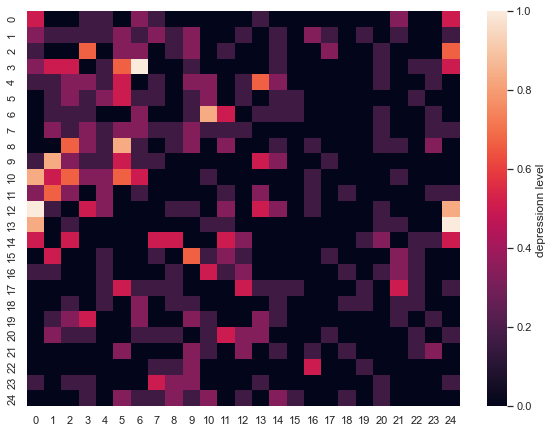

In [212]:
sns.set(rc={'figure.figsize':(9.7,7.27)})
ax = sns.heatmap(normalized_board ,  
                 cbar_kws={'label': 'depressionn level '})

plt.savefig('output.png')

In [210]:
model_3 = load_model('final models future wellbeing/model-337-2.6285')

In [211]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 400)               13200     
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 400)               0         
                                                                 
 dropout_12 (Dropout)        (None, 400)               0         
                                                                 
 dense_16 (Dense)            (None, 400)               160400    
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 400)               0         
                                                                 
 dropout_13 (Dropout)        (None, 400)               0         
                                                                 
 dense_17 (Dense)            (None, 400)              